# Prerequisites
- LWE
- Abstract algebra - rings

# Theory

- https://www.youtube.com/watch?v=Lo-_ZBqGa7I - Followed this

*Idea*: $\text{LWE}$ on polynomials over rings

## The why

**$\text{LWE}$ Disadvantage**
- Big keys + matrix mutiplications => quadratic time $\mathcal{O}(n^2)$ => to encrypt/ decrypt => Slow

*Idea*
- We want to transform $As + e = B \in  (\mathbb{Z}/q\mathbb Z)^n$ into $A \star s + e = B \in  (\mathbb{Z}/q\mathbb Z)^n$ where $\star$ is a faster operator

**Solution**
- $\star = $ multiplication in **polynomial ring** $\mathbb{Z}_q[X]/(f(X)$ where $f(X)$ is an irreductible polynomial of degree $n$ (Ex: $X^n + 1$)
    - Fast fourier transforms => $n \log n$ operations $\bmod q$

## Rings geometry

suggested reading: 
- https://eprint.iacr.org/2012/230.pdf - page 11
- or https://eprint.iacr.org/2015/938.pdf -page 34 



Let 
- $R =  (\mathbb{Z}/q\mathbb Z)[X]/(f(X)$  where $f(X)$ is an irreductible polynomial of degree $n$
- $R_q = R/qR$ 
    - Elements here are $poly$ of $deg < n$ with coeff $\bmod q$

#### Embeddings

**Coefficient embedding**  
&emsp; For every $f \in R$ we associate the $n-$dimensional vector of coefficients

**Canonical embedding**
- $f$ is a polynomial in $R$ of degree $n$ => it has $n$ *complex* roots
- Evaluating the polynomial at a root $\alpha_i$ gives a homomorphism into $\mathbb{C}$
    - We have $n$ homomorphisms $X \mapsto \alpha_i$
    
> *canonical embedding*: $\sigma : R \to \mathbb{C^n}, \sigma(f) = (f(\alpha_i))$
- We can define norms $\|f\|_2 = \|\sigma(f)\|_2$
- $\sigma(a + b) = \sigma(a) + \sigma(b)$
- $\sigma(ab) = \sigma(a) \cdot \sigma(b)$

Examples (go over them) : https://youtu.be/Lo-_ZBqGa7I?t=2082

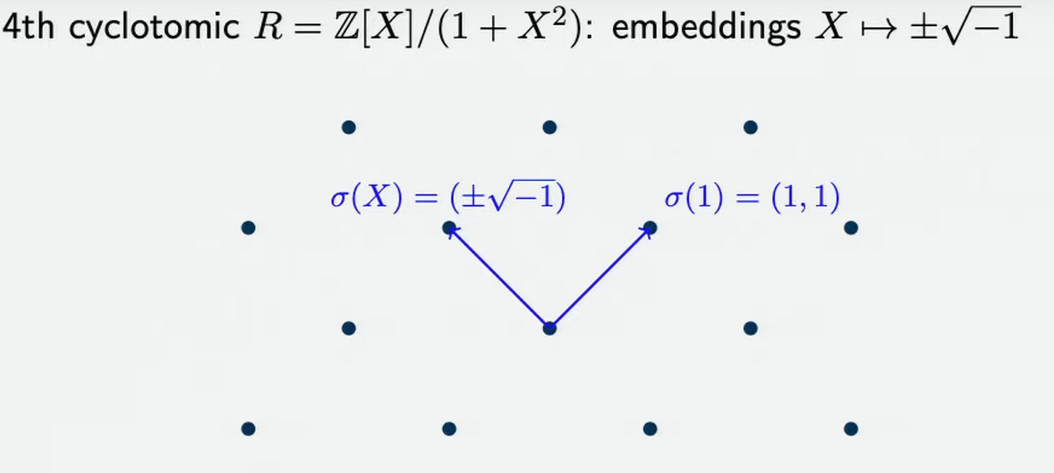
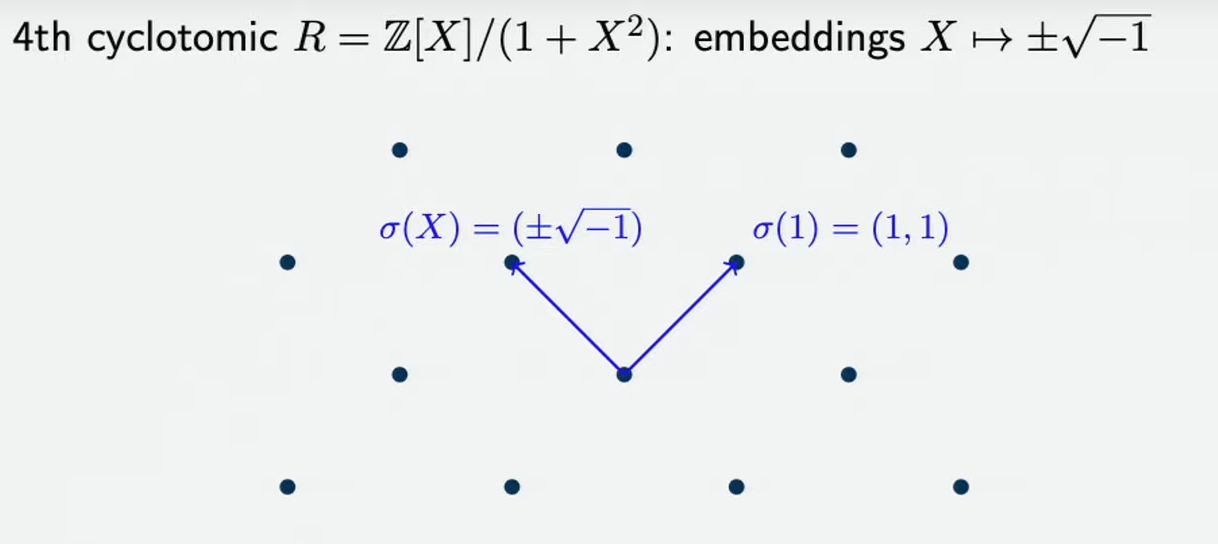

**Cyclotomic ring**
- suggested reading (again) : https://eprint.iacr.org/2012/230.pdf - page 11
- Usually $n=2^k$. Why?
- In any $2^k$ cyclotomic for any $j$ we have: $\|X^j\|_2 = \sqrt n$ and $\|X^j\|_{\infty} = 1$
- $\{1, X, ..., X^{n-1}\}$ is **orthogonal** under the $\sigma$ embedding
    - Coeff / canonical embedings are equivalent (up to $\sqrt n$ scaling)

#### Dual Ideal

- https://en.wikipedia.org/wiki/Ideal_(ring_theory)
- $R$ has a dual ideal $R^\vee$
- $R_q = R/qR$ and $R^\vee = R^\vee / qR^\vee$

**Trace function**  
&emsp; Let $Tr$ be the following function: $$Tr : R \to \mathbb{Z}$$ $$Tr(a) = \sum_{i\in \mathbb{Z}_M^*}a(w^i)$$
- *Intuition:* Sum of all embeddings
- $Tr(a \cdot b) = \sum_i a(w^i) \cdot b(w^i) = \underbrace{\langle \sigma(a), \overline{\sigma(b)} \rangle}_{\text{"inner product"}}$

**Dual**  
&emsp; $R$'s dual: $R^\vee = \{b: tr(a\cdot b) \in \mathbb{Z} \ \forall a \in R\}$

- Power of 2 cyclotomic ring (Just a scaling of $R$): 

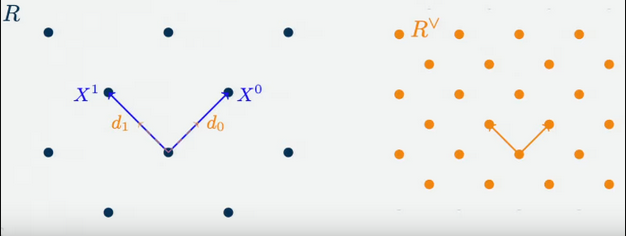

**Note**
- if $n \neq 2^k$ the basis is not orthogonal anymore
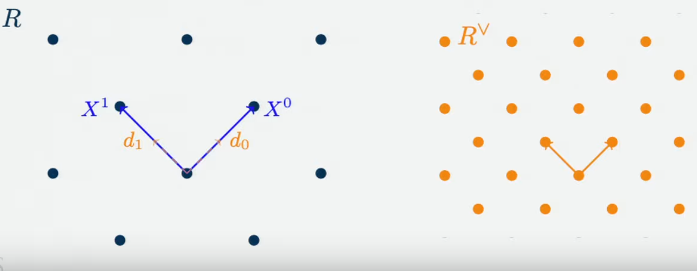

## Ring-LWE

Let 
- $R =  (\mathbb{Z}/q\mathbb Z)[X]/(f(x)$  where $f(x)$ is an irreductible polynomial of degree $n$
- $R_q = R/qR$ 
    - Elements here are $poly$ of $deg < n$ with coeff $\bmod q$
    
Let $\text{LWE}_{R, q, \chi, m}$ (or $\text{RLWE}_{q, \chi, m}$) be a Ring-LWE problem:

**Search problem**  
&emsp; Given $m$ pairs $(a_1, ...), (b_1, ...)$ generated as follows: 

$$
\begin{equation}
a_1 \leftarrow R_q , \ \ b_1 = s \cdot a_1 + e_1 \in R_q^\vee\\
a_2 \leftarrow R_q , \ \ b_2 = s \cdot a_2 + e_2 \in R_q^\vee\\
\vdots
\end{equation}
$$
&emsp; for errors from a gaussian of width $\alpha q$ over $R_q^\vee$

Find $s \in R_q^\vee$

**Decision**
&emsp; Distinguish $(a_i, b_i)$ from uniform $(a_i, b_i) \in R_q \times R_q^\vee$

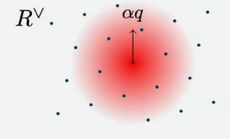
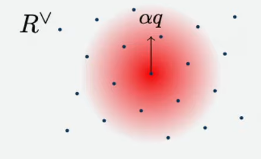

## Public Cryptosystem
- https://eprint.iacr.org/2012/230.pdf - page 4

Public parameters: $n, R_q$, sometimes $a \in R_q$

**Alice** 
- chooses a secret $s \leftarrow \chi, s \in R$
- chooses an error $e \leftarrow \chi$
- sends to Bob her **public key**
    - $(a, b = as + e)$ - RLWE pair


**Bob**
- chooses a message $m \in R_2$ - $n$-bit string
- chooses an error $e_1, e_2 \leftarrow \chi$
- chooses $r \leftarrow \chi$
- *Encrypts* and sends to Alice
    - $u = a \cdot r + e_1 \in R_q$ 
    - $v = b \cdot r + e_2 + m \cdot \dfrac q 2 \in R_q$

**Alice**
- *Decrypts*
    - $v - s \cdot u \approx m \cdot \cfrac q 2 + \underbrace{\underbrace{b}_{\approx a \cdot s} \cdot r - s \cdot a \cdot r}_{\text{very small}} \approx m \cdot \dfrac q 2$


# Code

- https://eprint.iacr.org/2012/230.pdf - page 4

In [1]:
from sage.stats.distributions.discrete_gaussian_polynomial import DiscreteGaussianDistributionPolynomialSampler
import random

In [2]:
#Parameters
n = 2**4
q = next_prime(800)
#Rings
P.<x> = Zmod(q)[]
RQ.<X>  = P.quotient(x**n + 1)
D = DiscreteGaussianDistributionPolynomialSampler(P, n=n, sigma=sqrt(n) - 1) #not sure how wide should the error be
#Generate A
a = RQ.random_element()

In [3]:
#Alice1
def generate_public_key(a, D):
    s = D()
    e = D()
    b = a * s + e
    return s, b

s, b = generate_public_key(a, D) #s is secret, b is public
print(b)

740*X^15 + 284*X^14 + 726*X^13 + 428*X^12 + 359*X^11 + 548*X^10 + 217*X^9 + 234*X^8 + 111*X^7 + 640*X^6 + 786*X^5 + 796*X^4 + 111*X^3 + 504*X^2 + 225*X + 34


In [4]:
#Bob1
def encrypt_msg(msg, b, a, D):
    e1 = D()
    e2 = D()
    r = D()
    
    u = a * r + e1
    v = b * r + e2 + msg * (q//2)
    
    return u, v
    
msg = [random.randint(0, 1) for _ in range(n)]
print(msg, RQ(msg))
u, v = encrypt_msg(RQ(msg), b, a, D)

print(u)
print(v)

[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1] X^15 + X^13 + X^7 + X^6 + X^2 + 1
203*X^15 + 757*X^14 + 644*X^13 + 389*X^12 + 378*X^11 + 490*X^10 + 409*X^9 + 237*X^8 + 175*X^7 + 233*X^6 + 678*X^5 + 735*X^4 + 549*X^3 + 2*X^2 + 620*X + 80
577*X^15 + 318*X^14 + 229*X^13 + 338*X^12 + 618*X^11 + 547*X^10 + 550*X^9 + 194*X^8 + 452*X^7 + 218*X^6 + 286*X^5 + 397*X^4 + 690*X^3 + 72*X^2 + 778*X + 645


In [5]:
#Decrypt
temp = v - s * u
print(temp, list(temp))

print([int(q//4 < coeff <= 3 * q//4) for coeff in temp.list()]) # check if it's closer to q//2 to receive the bit
print(msg)

358*X^15 + 804*X^14 + 351*X^13 + 110*X^12 + 747*X^11 + 92*X^10 + 780*X^9 + 25*X^8 + 442*X^7 + 402*X^6 + 807*X^5 + 63*X^4 + 12*X^3 + 342*X^2 + 91*X + 395 [395, 91, 342, 12, 63, 807, 402, 442, 25, 780, 92, 747, 110, 351, 804, 358]
[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]


**Note**
- Obviously you can do this using vectors mod q but I used rings for illustrative purposes

## Defined constructions

In [6]:
from sage.crypto.lwe import RingLWE
from sage.stats.distributions.discrete_gaussian_polynomial import DiscreteGaussianDistributionPolynomialSampler

In [7]:
n = 8
q = 127
D = DiscreteGaussianDistributionPolynomialSampler(ZZ['x'], n=n, sigma=3.0)

rlwe = RingLWE(N=20, q=q, D=D)
rlwe

RingLWE(20, 127, Discrete Gaussian sampler for polynomials of degree < 8 with σ=3.000000 in each component, x^8 - x^6 + x^4 - x^2 + 1, 'uniform', None)

In [8]:
l = [rlwe() for _ in range(3)]
l

[((105, 90, 81, 72, 52, 93, 92, 126), (68, 33, 110, 96, 22, 14, 122, 66)),
 ((81, 125, 117, 42, 5, 82, 51, 61), (53, 116, 1, 88, 51, 116, 6, 88)),
 ((109, 68, 60, 37, 124, 95, 105, 55), (94, 116, 114, 66, 108, 41, 113, 102))]

In [9]:
l[0][0].parent(), l[0][1].parent()

(Vector space of dimension 8 over Ring of integers modulo 127,
 Vector space of dimension 8 over Ring of integers modulo 127)

# Resources

- https://web.eecs.umich.edu/~cpeikert/pubs/lattice-survey.pdf - page 30
- https://eprint.iacr.org/2015/938.pdf
- http://cryptowiki.net/index.php?title=LWE-based_cryptographic_protocols